In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools
import cv2
from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report

In [2]:
pwd

'C:\\Users\\DELL\\Desktop\\imageiden'

In [3]:
df = pd.read_csv('GroundTruth.csv')
df.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(10015, 8)

In [5]:
dfVASC = df[df["VASC"]==1]

In [6]:
dfVASC.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
64,ISIC_0024370,0.0,0.0,0.0,0.0,0.0,0.0,1.0
69,ISIC_0024375,0.0,0.0,0.0,0.0,0.0,0.0,1.0
96,ISIC_0024402,0.0,0.0,0.0,0.0,0.0,0.0,1.0
169,ISIC_0024475,0.0,0.0,0.0,0.0,0.0,0.0,1.0
356,ISIC_0024662,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
dfVASC.drop(columns=["MEL", "NV", "AKIEC", "BCC", "BKL", "DF"], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\4111759031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfVASC.drop(columns=["MEL", "NV", "AKIEC", "BCC", "BKL", "DF"], inplace=True)


In [8]:
dfVASC.head()

,image,VASC
64,ISIC_0024370,1.0
69,ISIC_0024375,1.0
96,ISIC_0024402,1.0
169,ISIC_0024475,1.0
356,ISIC_0024662,1.0


In [9]:
dfNotVASC = df[df["VASC"]==0]

In [10]:
dfNotVASC.tail()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
10010,ISIC_0034316,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10011,ISIC_0034317,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10012,ISIC_0034318,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10013,ISIC_0034319,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10014,ISIC_0034320,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [11]:
dfNotVASC.drop(columns=["MEL", "NV", "AKIEC", "BCC", "BKL", "DF"], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\3988146044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNotVASC.drop(columns=["MEL", "NV", "AKIEC", "BCC", "BKL", "DF"], inplace=True)


In [12]:
dfNotVASC.head()

,image,VASC
0,ISIC_0024306,0.0
1,ISIC_0024307,0.0
2,ISIC_0024308,0.0
3,ISIC_0024309,0.0
4,ISIC_0024310,0.0


In [13]:
dfNotVASC.shape

(9873, 2)

In [14]:
dfVASC.shape

(142, 2)

In [15]:
dfNotVASC = dfNotVASC.sample(frac = 0.02, random_state = 40)

In [16]:
dfVASC.shape

(142, 2)

In [17]:
dfNotVASC.shape

(197, 2)

In [18]:
df = pd.concat([dfVASC, dfNotVASC])

In [19]:
df.head()

,image,VASC
64,ISIC_0024370,1.0
69,ISIC_0024375,1.0
96,ISIC_0024402,1.0
169,ISIC_0024475,1.0
356,ISIC_0024662,1.0


In [20]:
df.shape

(339, 2)

In [21]:
df = df.sample(frac=1, random_state=30)

In [22]:
df.head()

,image,VASC
8469,ISIC_0032775,1.0
2150,ISIC_0026456,1.0
8308,ISIC_0032614,1.0
8843,ISIC_0033149,0.0
1954,ISIC_0026260,0.0


In [23]:
imageArray = df["image"].to_numpy()

In [24]:
imageArray.shape

(339,)

In [25]:
pwd

'C:\\Users\\DELL\\Desktop\\imageiden'

In [26]:
cd images

C:\Users\DELL\Desktop\imageiden\images


In [27]:
pwd

'C:\\Users\\DELL\\Desktop\\imageiden\\images'

In [28]:
Images = []

In [29]:
def processImage(image):
    image = cv2.resize(image, (150, 200))
    image = image.astype("float32") / 255
    return image

In [30]:
for img in imageArray:
    path = img + ".jpg"
    image = cv2.imread(path)
    image = processImage(image)
    Images.append(image)

In [31]:
len(Images)

339

In [32]:
pwd

'C:\\Users\\DELL\\Desktop\\imageiden\\images'

In [33]:
np.save("VASCIMAGES.npy", Images)

In [34]:
output = df["VASC"].to_numpy()

In [35]:
len(output)

339

In [36]:
output.shape

(339,)

In [37]:
xTrain, xTest, yTrain, yTest = train_test_split(np.array(Images), output, test_size = 0.2, random_state = 30)

In [38]:
xTrain.shape

(271, 200, 150, 3)

In [39]:
yTrain.shape

(271,)

In [40]:
xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size = 0.2, random_state = 30)

In [41]:
xVal.shape

(55, 200, 150, 3)

In [42]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(200, 150, 3)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 75, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 75, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 75, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 118400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     7,577,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,597,121 (28.98 MB)

 Trainable params: 7,597,121 (28.98 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Accuracy"])

In [44]:
history = model.fit(xTrain, yTrain, validation_data = (xVal, yVal), epochs = 10, batch_size = 4)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - Accuracy: 0.4920 - loss: 1.6840 - val_Accuracy: 0.5818 - val_loss: 0.6911
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - Accuracy: 0.5918 - loss: 0.6534 - val_Accuracy: 0.5818 - val_loss: 0.4988
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - Accuracy: 0.6520 - loss: 0.5468 - val_Accuracy: 0.8364 - val_loss: 0.4619
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - Accuracy: 0.8211 - loss: 0.4318 - val_Accuracy: 0.9273 - val_loss: 0.4147
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - Accuracy: 0.8292 - loss: 0.4857 - val_Accuracy: 0.8909 - val_loss: 0.3516
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - Accuracy: 0.8502 - loss: 0.3729 - val_Accuracy: 0.8909 - val_loss: 0.2597
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - Accuracy: 0.9070 - loss: 0.2908 - val_Accuracy: 0.7636 - val_loss: 0.4852
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - Accuracy: 0.8996 - loss: 0.2959 - val_Accuracy: 0.8909 

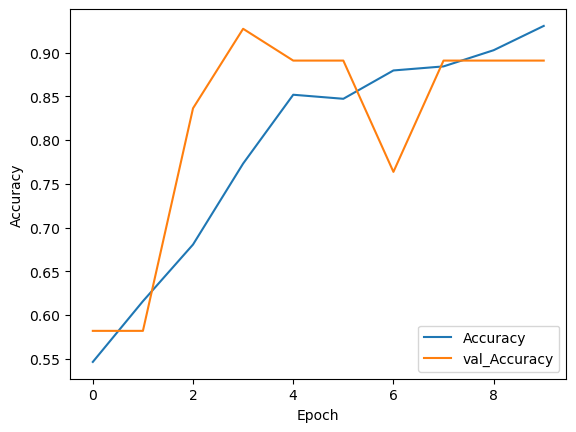

In [47]:
plt.plot(history.history['Accuracy'], label='Accuracy')
plt.plot(history.history['val_Accuracy'], label='val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [65]:
predictions = model.predict(xTest)

In [66]:
preds = []

In [67]:
for p in predictions:
    if p>=0.5:
        preds.append(1)
    else:
        preds.append(0)

In [68]:
report = classification_report(yTest, preds, target_names = ["NOT VASC", "VASC"])

In [69]:
print(report)

              precision    recall  f1-score   support

    NOT VASC       0.90      0.68      0.78        38
        VASC       0.69      0.90      0.78        30

    accuracy                           0.78        68
   macro avg       0.79      0.79      0.78        68
weighted avg       0.81      0.78      0.78        68

